<a href="https://colab.research.google.com/github/q890003/Hybrid-image_Image-pyramid_Colorizing-the-Russian-Empire/blob/master/ML_hw4_1_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt

#generate number points (x,y),    x ~ N(mean_x, var_x), y ~ N(mean_y, var_y)
def gen_data( N1, N2, num_pts):
    mean_x, var_x = N1[0], N1[1]
    mean_y, var_y = N2[0], N2[1]
    sigma_x, sigma_y = var_x**(0.5), var_y**(0.5)

    points_x, points_y = [], []
    for i in range(num_pts):
        z_x = np.sum(np.random.uniform(0.0, 1.0, 12)) - 6
        z_y = np.sum(np.random.uniform(0.0, 1.0, 12)) - 6
        #formula: z = (x-m)/sigma -> x= z*sigma + mean
        gen_value_x = z_x *sigma_x + mean_x
        gen_value_y = z_y *sigma_y + mean_y
        points_x.append(gen_value_x)
        points_y.append(gen_value_y)
    return points_x, points_y
#sigmoid
def sigmoid(X, w):
    Xw = X.dot(w)
    sigmoids = np.zeros((2*50,1), dtype=float)
    for i in range(len(Xw)):
            sigmoids[i] = 1/(1+np.exp(-1 * Xw[i] ))
    return sigmoids

#confusion matrix
def analysis(ture_label, predict_label):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(2*50):
        if predict_label[i] >=0:
            if ture_label[i] == 1:
                TP += 1
            else:
                FP += 1
        else:
            if ture_label[i] == 1:
                FN += 1
            else:
                TN += 1
    return TP, TN, FP, FN
#init input
N = 50
#class 1 
c1_parameter_x = (1,2)   #(mean, var)
c1_parameter_y = (1,2)
#class 2
c2_parameter_x = (3,4)
c2_parameter_y = (3,4)
""""""
#generate 2 classes data.
c1_pts_x, c1_pts_y = gen_data( c1_parameter_x, c1_parameter_y, num_pts=50)
c2_pts_x, c2_pts_y = gen_data( c2_parameter_x, c2_parameter_y, num_pts=50)
pts_x, pts_y = c1_pts_x+c2_pts_x, c1_pts_y+c2_pts_y

#set design matrix
X = np.zeros((2*N,3), dtype=float)
X[:,0], X[:,1], X[:,2] =  1, pts_x, pts_y

#set lebel
Label = np.zeros((2*N, 1), dtype=float)
Label[:N,0] = 1

#Gradient descent
w = np.zeros((3,1), dtype= float)
for k in range(100):
    adjust = X.T.dot( Label - sigmoid(X,w))
    w = w + adjust
    if np.all(np.less(np.absolute(adjust),10)):
        break
w_gradient = w


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


Gradient descent:

w:
[167.27672393]
[-40.51916403]
[-44.31051197]

Confusion Matrix:
		 Predict cluster 1 Predict cluster 2
Is cluster 1		 45 		 5
Is cluster 2		 11 		 39
Sensitivity (Successfully predict cluster 1): 0.9
Specificity (Successfully predict cluster 2): 0.78
----------------------------------------
Newton's method:

w:
[1.51227107]
[-0.31943455]
[-0.41193478]

Confusion Matrix:
		 Predict cluster 1 Predict cluster 2
Is cluster 1		 46 		 4
Is cluster 2		 14 		 36
Sensitivity (Successfully predict cluster 1): 0.92
Specificity (Successfully predict cluster 2): 0.72


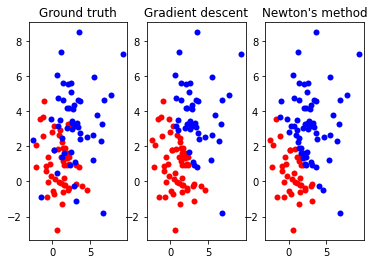

In [0]:
#Newton method
w = np.zeros((3,1), dtype=float)
D = np.zeros((2*N, 2*N), dtype=float)
for k in range(100):
    sigs = sigmoid(X, w)
    sigs = sigs*(1-sigs) 
    for i in range(2*N):
        D[i,i] =  sigs[i]
    H = X.T.dot(D).dot(X)
    delta_f = X.T.dot(Label - sigmoid(X,w))
    #update w.
    if np.linalg.det(H) == 0:
        adjust = delta_f
        w = w + adjust
    else:
        H_inv = np.linalg.inv(H)
        adjust = H_inv.dot(delta_f)
        w = w + adjust

    if np.all(np.less(np.absolute(adjust), 10)):
        break
w_newton = w

#prediction
pdict_grad_c1x, pdict_grad_c1y = [], []
pdict_grad_c2x, pdict_grad_c2y = [], []
pdict_Newt_c1x, pdict_Newt_c1y = [], []
pdict_Newt_c2x, pdict_Newt_c2y = [], []
pdict_grad = X.dot(w_gradient)
pdict_Newt = X.dot(w_newton)
for i in range(2*N):
    if pdict_grad[i] >=0.5:
        pdict_grad_c1x.append(pts_x[i])
        pdict_grad_c1y.append(pts_y[i])
    else:
        pdict_grad_c2x.append(pts_x[i])
        pdict_grad_c2y.append(pts_y[i])
    if pdict_Newt[i] >=0.5:
        pdict_Newt_c1x.append(pts_x[i])
        pdict_Newt_c1y.append(pts_y[i])
    else:
        pdict_Newt_c2x.append(pts_x[i])
        pdict_Newt_c2y.append(pts_y[i])

print("Gradient descent:\n")
print("w:")
for i in range(3):
    print(w_gradient[i])
print()
print("Confusion Matrix:")
TP, TN, FP, FN = analysis(Label, pdict_grad)
print("\t\t Predict cluster 1 Predict cluster 2")
print("Is cluster 1\t\t", TP, "\t\t", FN)
print("Is cluster 2\t\t", FP, "\t\t", TN)
print("Sensitivity (Successfully predict cluster 1):", TP/(TP+FN))
print("Specificity (Successfully predict cluster 2):", TN/(TN+FP))
print("----------------------------------------")
print("Newton's method:\n")
print("w:")
for i in range(3):
    print(w_newton[i])
print()
print("Confusion Matrix:")
TP, TN, FP, FN = analysis(Label, pdict_Newt)
print("\t\t Predict cluster 1 Predict cluster 2")
print("Is cluster 1\t\t", TP, "\t\t", FN)
print("Is cluster 2\t\t", FP, "\t\t", TN)
print("Sensitivity (Successfully predict cluster 1):", TP/(TP+FN))
print("Specificity (Successfully predict cluster 2):", TN/(TN+FP))
#decision boundary
db_x = np.linspace(-5,15, 10)
db_y = -1 * (w_gradient[0]+ db_x* w_gradient[1] )/w_gradient[2]
plt.figure()
plt.subplot(131), plt.title("Ground truth")
plt.scatter(c1_pts_x,c1_pts_y,linewidths=0.001,color = 'red')
plt.scatter(c2_pts_x,c2_pts_y,linewidths=0.001,color = 'blue')

plt.subplot(132), plt.title("Gradient descent")
plt.scatter(pdict_grad_c1x,pdict_grad_c1y,linewidths=0.001,color = 'red')
plt.scatter(pdict_grad_c2x,pdict_grad_c2y,linewidths=0.001,color = 'blue')

plt.subplot(133), plt.title("Newton's method")
plt.scatter(pdict_Newt_c1x,pdict_Newt_c1y,linewidths=0.001,color = 'red')
plt.scatter(pdict_Newt_c2x,pdict_Newt_c2y,linewidths=0.001,color = 'blue')
